In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df=pd.read_csv(r"C:\Users\palak\Downloads\train.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print("Missing Values")
df.isnull().sum()

Missing Values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
print("value count for target")
print(df['Survived'].value_counts())

value count for target
Survived
0    549
1    342
Name: count, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


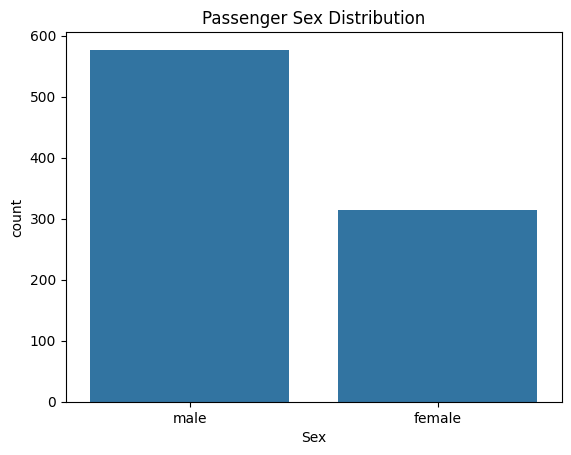

In [45]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex',data=df)
plt.title("Passenger Sex Distribution")
plt.show()

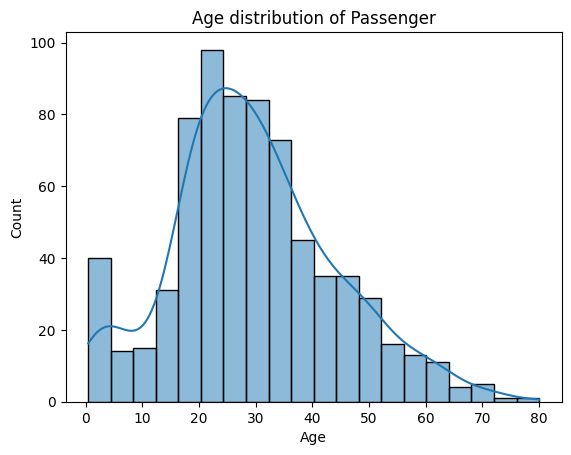

In [16]:
sns.histplot(df["Age"].dropna(),bins=20,kde=True)
plt.title("Age distribution of Passenger")
plt.show()

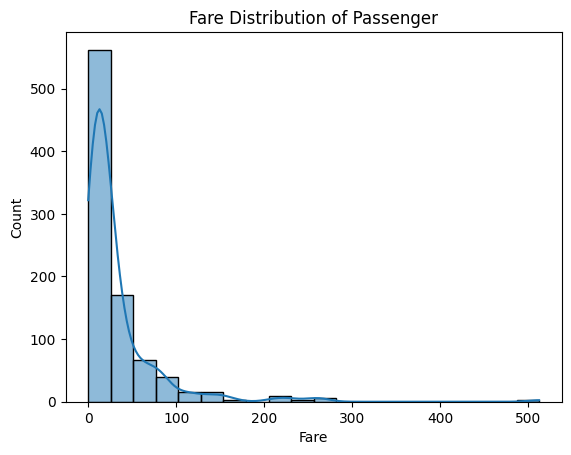

In [17]:
sns.histplot(df['Fare'].dropna(),bins=20,kde=True)
plt.title("Fare Distribution of Passenger")
plt.show()

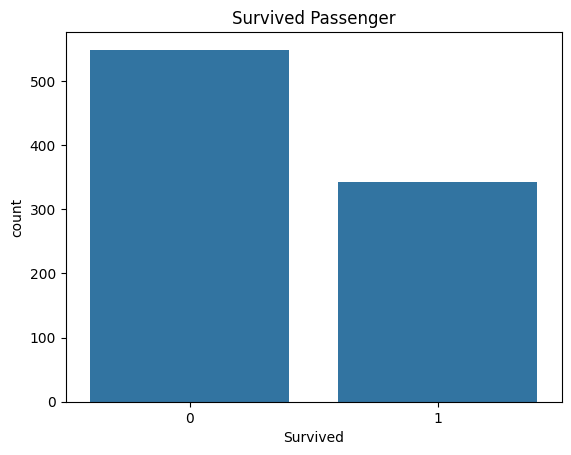

In [21]:
sns.countplot(x="Survived",data=df)
plt.title("Survived Passenger")
plt.show()

BIVARIATE ANALYSIS

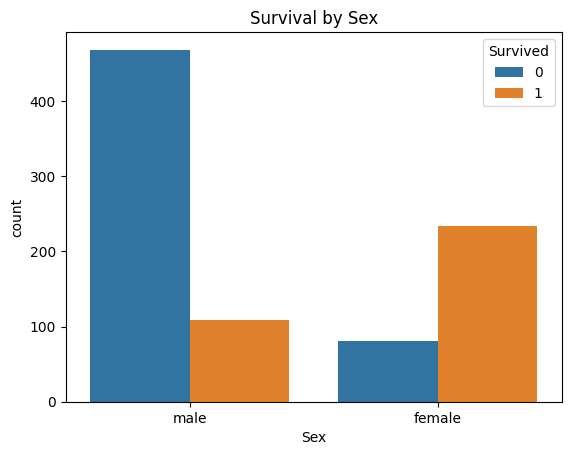

In [18]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Survival by Sex")
plt.show()

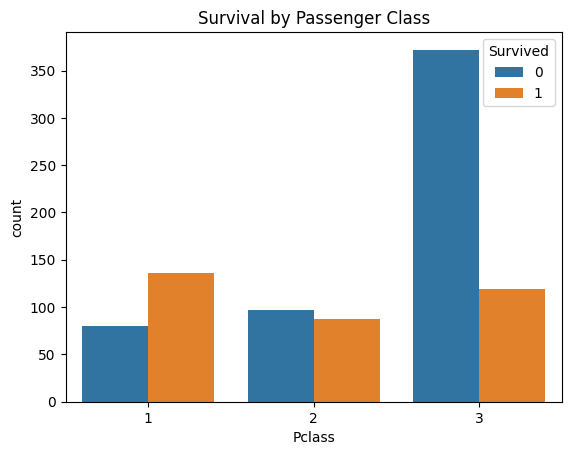

In [24]:
sns.countplot(x="Pclass",hue="Survived",data=df)
plt.title("Survival by Passenger Class")
plt.show()

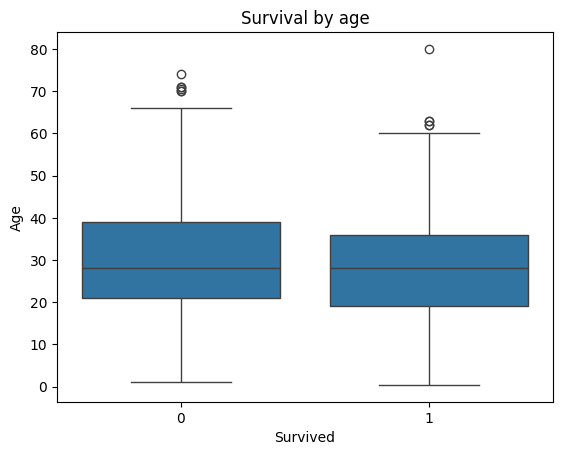

In [26]:
sns.boxplot(x="Survived",y="Age",data=df)
plt.title("Survival by age")
plt.show()

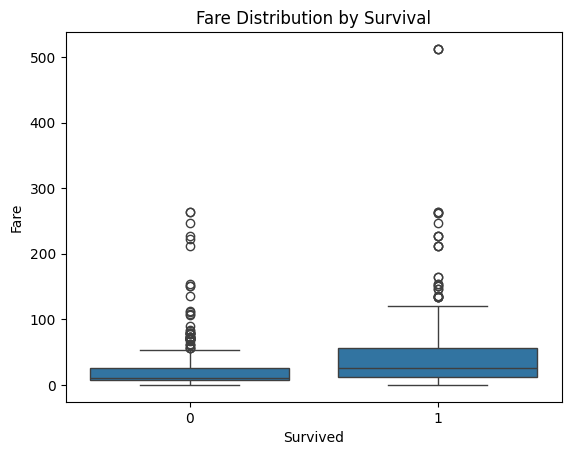

In [29]:
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution by Survival")
plt.show()

CORREALTION ANALYSIS

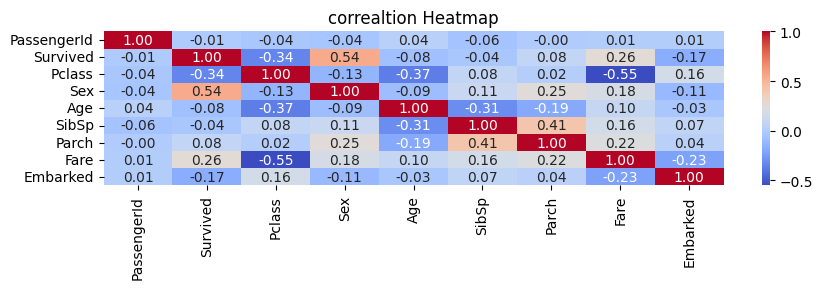

In [39]:
df_corr=df.copy()
df_corr['Sex']=df_corr["Sex"].map({'male':0,"female":1})
df_corr["Embarked"]=df_corr["Embarked"].map({"C":0,"Q":1,"S":2})
plt.figure(figsize=(10,2))
numeric_data = df_corr.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correaltion Heatmap")
plt.show() 



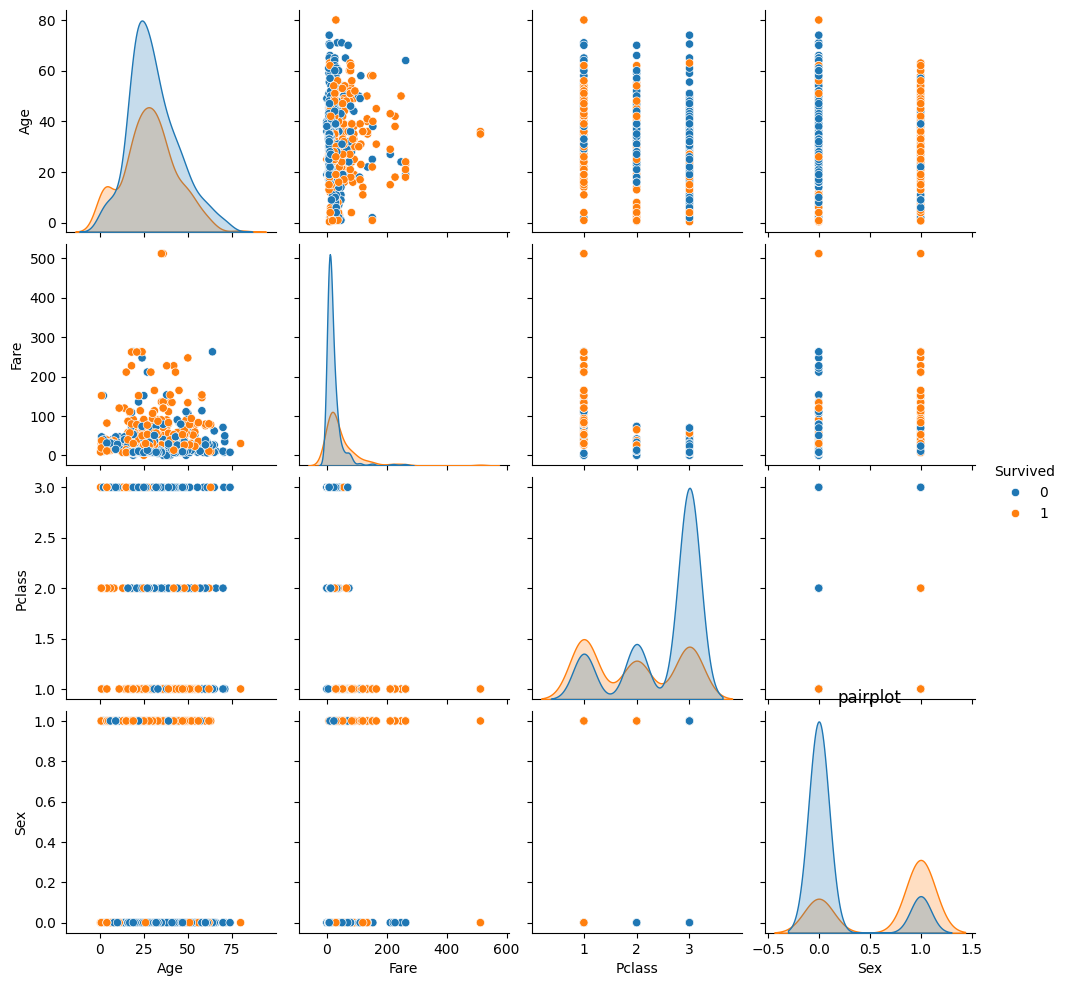

In [44]:
sns.pairplot(df_corr[["Survived","Age","Fare","Pclass","Sex"]],hue="Survived")
plt.title("pairplot")
plt.show()

 Observations for Each Visual-
 
1.Survival Count (Bar Plot)-
About 62% of passengers died (Survived = 0).
Around 38% survived (Survived = 1).

The dataset is imbalanced toward non-survivors.

2.Passenger Sex Distribution
The dataset has more males than females.
Around 65% male, 35% female.

3.Age Distribution (Histogram)
Most passengers were between 20–40 years old.
There are some infants and children, and a few passengers above 60 years.

4.Fare Distribution (Histogram)
Most fares are below 100, with a few very high outliers (>500).
The distribution is right-skewed (a small number of wealthy passengers paid very high fares).

5.Survival by Sex (Bar Plot)
Females had much higher survival rates than males.
Majority of males did not survive, while most females survived.

6.Survival by Passenger Class (Bar Plot)
1st Class passengers had the highest survival rate.
3rd Class passengers had the lowest survival rate.
Passenger class strongly influenced survival.

7.Age vs Survival (Boxplot)
Survivors tended to be slightly younger on average.
Many children and infants survived, possibly due to “women and children first” policy.

8.Fare vs Survival (Boxplot)
Passengers who paid higher fares had better survival rates.
This supports the finding that wealthier passengers (mostly 1st Class) survived more.

9.Correlation Heatmap
Strong positive correlation between Sex (female=1) and survival.
Pclass has a negative correlation with survival (higher class → more likely to survive).
Fare is positively correlated with survival.
Age has a weak negative correlation (younger → slightly higher chance of survival).

10.Pairplot (Multivariate View)
Confirms that female, 1st class, high-fare passengers had higher survival rates.
Shows visible separation between survivors and non-survivors in Fare and Pclass.
Age shows mixed patterns, but infants stand out as more likely to survive.


Summary of Findings

1.Gender was the strongest predictor: Females had a much higher survival rate than males.
2.Passenger Class mattered a lot: 1st class passengers had the highest survival rate, 3rd class the lowest.
3.Fare was positively correlated with survival: passengers who paid higher fares (often 1st class) were more likely to survive.
4.Age had some impact: children (especially infants) had better chances of survival, though the effect was weaker compared to gender and class.
5.Overall survival rate was low (38%), showing the tragedy’s severity.
6.The dataset shows clear social and economic factors influenced survival (gender, class, wealth).